## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import cv2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from sklearn.metrics import f1_score

## Data Reading and Preprocessing

In [2]:
data = pd.read_csv('../bank-additional/bank-additional-full.csv',sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data = data.drop(['duration'], axis=1)

In [4]:
print(data.columns)

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'pdays',
       u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')


In [5]:
print(data.shape)

(41188, 20)


In [6]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [7]:
data = data.dropna()
data.head()
df = data

In [8]:
split = int(0.8*data.shape[0])

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
le = LabelEncoder()
for ix in categorical_columns:
    data[ix] = le.fit_transform(data[ix])

In [11]:
data = data.dropna()
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Upsampling The Minority Class

In [12]:
data_majority = data[data.y==0]
data_minority = data[data.y==1]
print(data_majority.shape)
print(data_minority.shape)

(36548, 20)
(4640, 20)


In [13]:
data_minority_upsampled = resample(data_minority, replace=True, n_samples=12000, random_state=123) 

In [14]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [15]:
data_upsampled = data_upsampled.sample(frac=1).reset_index(drop=True)

In [16]:
data_upsampled = data_upsampled.values

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
data = data.values
print(data.shape)

(41188, 20)


## Decision Tree on Upsampled data

In [19]:
dt = DecisionTreeClassifier(max_depth=9)
pred = dt.fit(data_upsampled[:,:-1],data_upsampled[:,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(dt.score(data_upsampled[:,:-1],data_upsampled[:,-1])) )
print('Validation Accuracy: ' + str(dt.score(data[:,:-1],data[:,-1])) )

Training Accuracy: 0.8479854988876988
Validation Accuracy: 0.8980528309216277


In [20]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[4087 1611]
 [ 548 1992]]


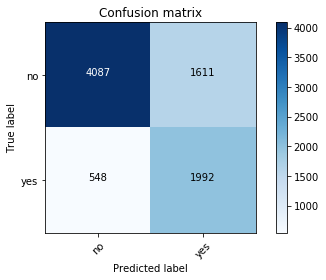

In [21]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [22]:
print(f1_score(data[split:,-1], pred))

0.648543057138206


## Random Forest on Upsampled data

In [24]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
pred = rf.fit(data_upsampled[:,:-1],data_upsampled[:,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(rf.score(data_upsampled[:,:-1],data_upsampled[:,-1])) )
print('Validation Accuracy: ' + str(rf.score(data[:,:-1],data[:,-1])) )

Training Accuracy: 0.8581815934744995
Validation Accuracy: 0.9065018937554628


In [25]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[4244 1454]
 [ 395 2145]]


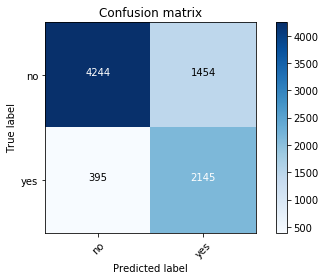

In [26]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [27]:
print(f1_score(data[split:,-1], pred))

0.6988108812510181


## SVM on Upsampled data

In [28]:
svm = SVC(gamma='auto')
pred = svm.fit(data_upsampled[:,:-1],data_upsampled[:,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(svm.score(data_upsampled[:,:-1],data_upsampled[:,-1])) )
print('Validation Accuracy: ' + str(svm.score(data[:,:-1],data[:,-1])) )

Training Accuracy: 0.8849798137925352
Validation Accuracy: 0.9286442653199961


In [29]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[5093  605]
 [ 456 2084]]


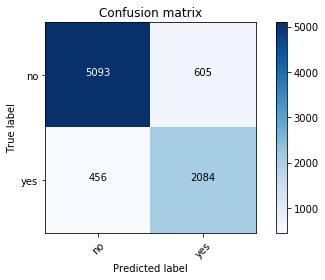

In [30]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [31]:
print(f1_score(data[split:,-1], pred))

0.797093134442532
